Automatically created module for IPython interactive environment


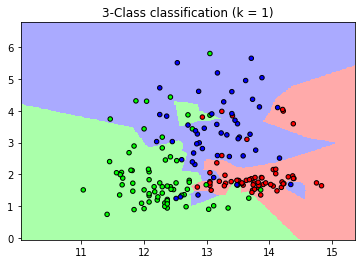

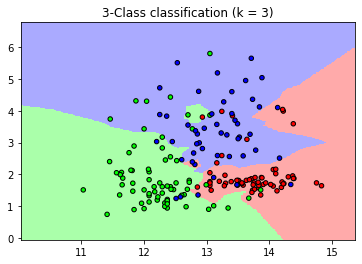

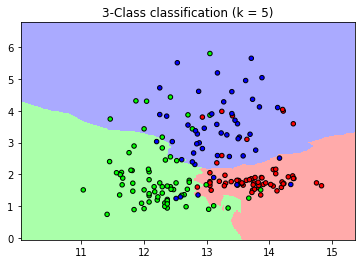

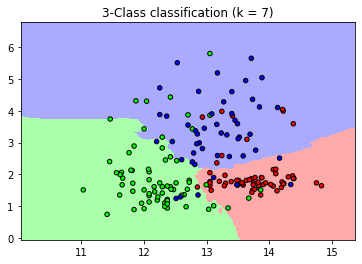

In [14]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, model_selection

#load wine dataset
wine = datasets.load_wine()

#we choose only the first two attributes
X = wine.data[:, :2]
y = wine.target

# divide to get the right percentage of train data
X_train, X_buf, y_train, y_buf = model_selection.train_test_split(X, y, shuffle=True, test_size=0.5)

# divide buffer into validation and test
X_valid, X_test, y_valid, y_test = model_selection.train_test_split(X_buf, y_buf, shuffle=True, test_size=0.6)

# delete buffer partitions
del X_buf, y_buf

# step size in the mesh - to check what this means
h = .02

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# array of variuos Ks to try KNN with
ks = [1,3,5,7]

# for which iterates every K and plots the relative data & decision boundaries 
for k in ks:
    n_neighbors = k;
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    # train the classifier on the training set
    clf.fit(X_train, y_train)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    
    #the arange method return evenly spaced data
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # test the classifier on the test set
    # ravel method returns a contigous flattened array
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)"
              % (n_neighbors))
plt.show()

